In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [4]:
df = pd.read_csv('HousePrices.csv')
df.head()

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Steps
1) Handling Null Values<br>
2) Univariate Data Analysis - EDA <br>
3) Bivariate Data Analysis - EDA <br>
4) Feature Selection using Correlation<br>
5) Handling Outliers<br>
6) Encoding Categorical columns<br>
7) Handling Multicollinearity<br>
8) Handling data normality<br>

7) Apply the Model <br>
a) Linear Regression<br>
b) OLS<br>

In [5]:
df1 = df.copy()
df1.shape

(2073, 81)

In [6]:
df.columns

Index(['Id', 'Dwell_Type', 'Zone_Class', 'LotFrontage', 'LotArea', 'Road_Type',
       'Alley', 'Property_Shape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'Dwelling_Type', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCo

### 1) Handling Null Values

In [10]:
nv = df1.isnull().sum()
print('Columns containing null values',len(nv[nv>0]))
nv[nv>0]
# 2073

Columns containing null values 19


LotFrontage      320
Alley           1944
MasVnrType        14
MasVnrArea        14
BsmtQual          59
BsmtCond          59
BsmtExposure      61
BsmtFinType1      59
BsmtFinType2      60
Electrical         1
FireplaceQu      988
GarageType       113
GarageYrBlt      113
GarageFinish     113
GarageQual       113
GarageCond       113
PoolQC          2065
Fence           1669
MiscFeature     1993
dtype: int64

In [11]:
df1['Alley'].value_counts()
# drop column or Fill it witha None value

Grvl    72
Pave    57
Name: Alley, dtype: int64

In [12]:
df1['PoolQC'].value_counts()

Gd    4
Fa    2
Ex    2
Name: PoolQC, dtype: int64

In [13]:
df1['Fence'].value_counts()

MnPrv    233
GdPrv     88
GdWo      69
MnWw      14
Name: Fence, dtype: int64

In [15]:
df1['MiscFeature'].value_counts()

Shed    74
Othr     3
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

In [ ]:
# df1.drop('Alley',axis=1,inplace=True)

In [16]:
df1.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)
nv = df1.isnull().sum()
nv[nv>0]

LotFrontage     320
MasVnrType       14
MasVnrArea       14
BsmtQual         59
BsmtCond         59
BsmtExposure     61
BsmtFinType1     59
BsmtFinType2     60
Electrical        1
FireplaceQu     988
GarageType      113
GarageYrBlt     113
GarageFinish    113
GarageQual      113
GarageCond      113
dtype: int64

In [17]:
#### Basement Related Feature
# BsmtQual         59
# BsmtCond         59
# BsmtExposure     61
# BsmtFinType1     59
# BsmtFinType2     60

In [18]:
df1['BsmtQual'].value_counts()

Gd    904
TA    891
Ex    169
Fa     50
Name: BsmtQual, dtype: int64

In [19]:
df1['BsmtCond'].value_counts()

TA    1851
Gd     100
Fa      61
Po       2
Name: BsmtCond, dtype: int64

In [20]:
df1['BsmtExposure'].value_counts()

No    1349
Av     322
Gd     181
Mn     160
Name: BsmtExposure, dtype: int64

In [21]:
df1['BsmtFinType1'].value_counts()

Unf    604
GLQ    599
ALQ    319
BLQ    210
Rec    173
LwQ    109
Name: BsmtFinType1, dtype: int64

In [22]:
df1['BsmtFinType2'].value_counts()

Unf    1770
Rec      79
LwQ      68
BLQ      50
ALQ      24
GLQ      22
Name: BsmtFinType2, dtype: int64

In [23]:
df1['BsmtQual'].fillna('No Basement',inplace=True)
df1['BsmtCond'].fillna('No Basement',inplace=True)
df1['BsmtExposure'].fillna('No Basement',inplace=True)
df1['BsmtFinType1'].fillna('No Basement',inplace=True)
df1['BsmtFinType2'].fillna('No Basement',inplace=True)

nv = df1.isnull().sum()
nv[nv>0]

LotFrontage     320
MasVnrType       14
MasVnrArea       14
Electrical        1
FireplaceQu     988
GarageType      113
GarageYrBlt     113
GarageFinish    113
GarageQual      113
GarageCond      113
dtype: int64

In [ ]:
#### Garage Related Columns
# GarageType      113
# GarageYrBlt     113
# GarageFinish    113
# GarageQual      113
# GarageCond      113

In [ ]:
df1['GarageType'].value_counts()
df1['GarageYrBlt'].value_counts()
df1['GarageFinish'].value_counts()
df1['GarageQual'].value_counts()
df1['GarageCond'].value_counts()

In [24]:
df1['GarageType'].value_counts()

Attchd     1252
Detchd      537
BuiltIn     124
Basment      27
CarPort      12
2Types        8
Name: GarageType, dtype: int64

In [31]:
df1['GarageYrBlt'].value_counts().sort_values(ascending=False)
# type(df1['GarageYrBlt']

2005.0    116
2006.0     82
2007.0     81
2003.0     72
2004.0     66
         ... 
2015.0      1
2019.0      1
1908.0      1
1906.0      1
2013.0      1
Name: GarageYrBlt, Length: 102, dtype: int64

In [26]:
df1['GarageFinish'].value_counts()

Unf    857
RFn    605
Fin    498
Name: GarageFinish, dtype: int64

In [27]:
df1['GarageQual'].value_counts()

TA    1870
Fa      65
Gd      18
Ex       4
Po       3
Name: GarageQual, dtype: int64

In [28]:
df1['GarageCond'].value_counts()

TA    1885
Fa      47
Gd      17
Po       8
Ex       3
Name: GarageCond, dtype: int64

In [32]:
df1['GarageType'].fillna('No Garage',inplace=True)
df1['GarageYrBlt'].fillna(2005.0,inplace=True)
df1['GarageFinish'].fillna('No Garage',inplace=True)
df1['GarageQual'].fillna('No Garage',inplace=True)
df1['GarageCond'].fillna('No Garage',inplace=True)

nv = df1.isnull().sum()
nv[nv>0]

LotFrontage    320
MasVnrType      14
MasVnrArea      14
Electrical       1
FireplaceQu    988
dtype: int64

In [ ]:
# MasVnrType      14
# MasVnrArea      14

In [33]:
df1['MasVnrType'].value_counts()

None       1233
BrkFace     620
Stone       186
BrkCmn       20
Name: MasVnrType, dtype: int64

In [38]:
print(df1['MasVnrArea'].nunique())
print(df1['MasVnrArea'].dtype)
df1['MasVnrArea'].value_counts().sort_values(ascending=False)

342
float64


0.0      1229
108.0      12
340.0      10
210.0       9
106.0       9
         ... 
293.0       1
286.0       1
762.0       1
188.0       1
428.0       1
Name: MasVnrArea, Length: 342, dtype: int64

In [39]:
df1['MasVnrType'].fillna('None',inplace=True)
df1['MasVnrArea'].fillna(0.0,inplace=True)

nv = df1.isnull().sum()
nv[nv>0]

LotFrontage    320
Electrical       1
FireplaceQu    988
dtype: int64

In [44]:
print(df1['LotFrontage'].nunique())
print(df1['LotFrontage'].dtype)
df1['LotFrontage'].value_counts().sort_values(ascending=False)

110
float64


60.0     181
70.0      91
80.0      89
75.0      73
50.0      72
        ... 
153.0      1
140.0      1
160.0      1
182.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64

In [45]:
df1['FireplaceQu'].value_counts()

Gd    530
TA    457
Fa     40
Ex     33
Po     25
Name: FireplaceQu, dtype: int64

In [46]:
df1['LotFrontage'].fillna(60.0,inplace=True)
df1['FireplaceQu'].fillna('No Fireplace',inplace=True)

nv = df1.isnull().sum()
nv[nv>0]

Electrical    1
dtype: int64

In [49]:
df1.dropna(inplace=True)
nv = df1.isnull().sum()
nv[nv>0]

Series([], dtype: int64)

In [51]:
df1.shape

(2072, 77)

### Univariate Data Analysis

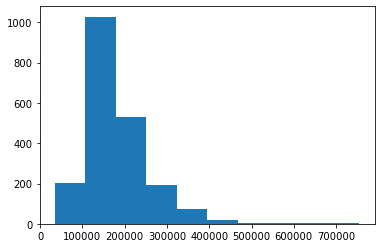

In [52]:
plt.hist(df1['Property_Sale_Price'])
plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


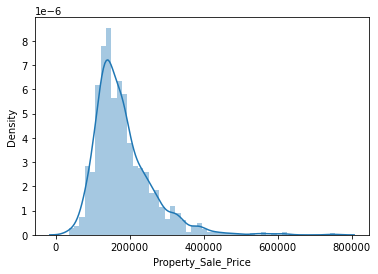

In [54]:
sns.distplot(df1['Property_Sale_Price'])
plt.show()

#### Inference
Data is not normally distributed

#### Applying Log transformation 

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


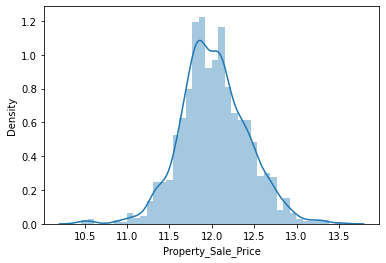

In [57]:
sns.distplot(np.log(df1['Property_Sale_Price']))
plt.show()

#### Applying log1p transformation

In [70]:
print(np.log(5))
print(np.log(6))
print(np.log1p(5)) # log1p(x) = log(1+x)

1.6094379124341003
1.791759469228055
1.791759469228055


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


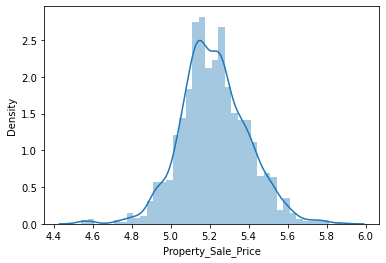

In [71]:
sns.distplot(np.log10(df1['Property_Sale_Price']))
plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


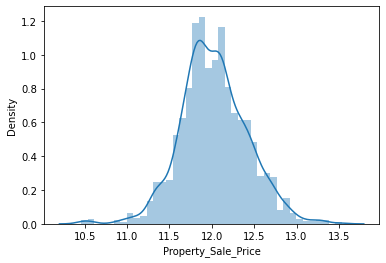

In [64]:
sns.distplot(np.log1p(df1['Property_Sale_Price']))
plt.show()

In [72]:
from scipy.stats import shapiro

In [74]:
# Original data
w_stat1, p1 = shapiro(df1['Property_Sale_Price'])
print('wstat1',w_stat1,'p1_val',p1)

# Log transformation
w_stat2, p2 = shapiro(np.log(df1['Property_Sale_Price']))
print('wstat2',w_stat2,'p2_val',p2)

# Log1p transformation
w_stat3, p3 = shapiro(np.log1p(df1['Property_Sale_Price']))
print('wstat3',w_stat3,'p3_val',p3)

# Log10 transformation
w_stat4, p4 = shapiro(np.log10(df1['Property_Sale_Price']))
print('wstat4',w_stat4,'p4_val',p4)

wstat1 0.8739566802978516 p1_val 5.183953449574285e-38
wstat2 0.9902242422103882 p2_val 1.2790961345654495e-10
wstat3 0.9902212619781494 p3_val 1.2725925868650734e-10
wstat4 0.99022376537323 p4_val 1.2780500269204964e-10


### Seperate categorical and numerical columns

In [75]:
df1.columns

Index(['Id', 'Dwell_Type', 'Zone_Class', 'LotFrontage', 'LotArea', 'Road_Type',
       'Property_Shape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'Dwelling_Type',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'Pav

In [77]:
df1.dtypes.value_counts()

object     39
int64      35
float64     3
dtype: int64

In [86]:
df1_obj_cols = df1.select_dtypes(include='object')
df1_num_cols = df1.select_dtypes(include=['int64','float64'])
print(df1_obj_cols.columns)
print(df1_num_cols.columns)
print(len(df1_num_cols.columns))

Index(['Zone_Class', 'Road_Type', 'Property_Shape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'Dwelling_Type', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')
Index(['Id', 'Dwell_Type', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
  

### Bivariate Data Analysis

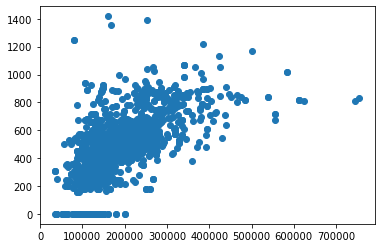

In [87]:
plt.scatter(df1['Property_Sale_Price'],df1['GarageArea'])
plt.show()

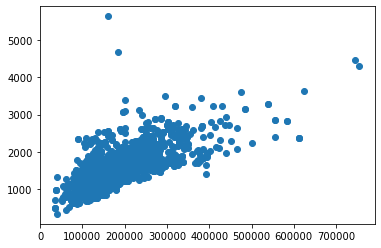

In [88]:
plt.scatter(df1['Property_Sale_Price'],df1['GrLivArea'])
plt.show()

In [89]:
# This step will consume time
# sns.pairplot(df)
# plt.show()

In [91]:
df1.head(3)

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Property_Shape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500


In [92]:
df1['Id'].nunique()

1819

In [93]:
df1.drop('Id',axis=1,inplace=True)
df1.head(2)

,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500


In [94]:
df1.shape

(2072, 76)

### Correlation

In [99]:
corr = df1.corr()
corr

,Dwell_Type,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Property_Sale_Price
Dwell_Type,1.000000,-0.071719,-0.033603,0.046333,0.033062,0.027133,0.042816,-0.004728,-0.034023,-0.025683,...,0.004618,0.002195,-6.508966e-03,-0.011960,-0.012006,0.001629,-0.003936,-0.020562,0.018885,-0.017389
LotFrontage,-0.071719,1.000000,0.221221,0.108937,-0.008508,0.079243,0.103031,0.116077,0.116483,0.050972,...,0.061824,0.092251,5.006471e-04,0.030561,0.019344,0.110290,-0.013013,0.023805,0.020880,0.263907
LotArea,-0.033603,0.221221,1.000000,0.078203,0.014179,-0.010492,0.017822,0.062091,0.164977,0.075862,...,0.121533,0.064347,-2.321801e-02,0.010589,0.035356,0.062455,0.030944,-0.001732,-0.006472,0.211565
OverallQual,0.046333,0.108937,0.078203,1.000000,-0.010335,0.335973,0.380123,0.279698,0.163181,-0.058273,...,0.155350,0.216826,-8.037282e-02,0.000408,0.021459,0.045121,-0.034248,0.033504,-0.021090,0.523573
OverallCond,0.033062,-0.008508,0.014179,-0.010335,1.000000,-0.245054,0.084426,-0.082108,-0.036151,0.026938,...,0.013869,-0.042428,4.440154e-02,0.017326,0.011943,-0.017013,0.041809,-0.025426,0.035086,-0.049982
YearBuilt,0.027133,0.079243,-0.010492,0.335973,-0.245054,1.000000,0.535864,0.262760,0.208634,-0.027057,...,0.180510,0.180436,-3.221118e-01,0.034133,-0.049017,0.005826,-0.038580,0.028056,-0.006278,0.437920
YearRemodAdd,0.042816,0.103031,0.017822,0.380123,0.084426,0.535864,1.000000,0.163084,0.101920,-0.073803,...,0.182954,0.222027,-1.776175e-01,0.040008,-0.036712,-0.009580,-0.011707,0.033755,0.058892,0.475765
MasVnrArea,-0.004728,0.116077,0.062091,0.279698,-0.082108,0.262760,0.163084,1.000000,0.234574,-0.078570,...,0.124678,0.137407,-9.696425e-02,0.030140,0.064491,0.003153,-0.034984,-0.020854,0.019775,0.478144
BsmtFinSF1,-0.034023,0.116483,0.164977,0.163181,-0.036151,0.208634,0.101920,0.234574,1.000000,-0.060894,...,0.207298,0.107295,-8.951616e-02,0.045050,0.046711,0.099498,-0.001564,-0.019474,0.030268,0.373284
BsmtFinSF2,-0.025683,0.050972,0.075862,-0.058273,0.026938,-0.027057,-0.073803,-0.078570,-0.060894,1.000000,...,0.073756,-0.001801,5.805965e-02,-0.030357,0.099534,0.027046,-0.002219,-0.016632,0.025526,-0.029067


In [111]:
corr['Property_Sale_Price'].sort_values(ascending=False)

Property_Sale_Price    1.000000
GrLivArea              0.710933
GarageCars             0.633995
GarageArea             0.621043
TotalBsmtSF            0.619063
1stFlrSF               0.600212
FullBath               0.549439
TotRmsAbvGrd           0.523799
OverallQual            0.523573
MasVnrArea             0.478144
YearRemodAdd           0.475765
Fireplaces             0.469715
YearBuilt              0.437920
GarageYrBlt            0.387518
BsmtFinSF1             0.373284
OpenPorchSF            0.344020
2ndFlrSF               0.327815
WoodDeckSF             0.325392
HalfBath               0.299549
LotFrontage            0.263907
BsmtUnfSF              0.231881
BsmtFullBath           0.219410
LotArea                0.211565
BedroomAbvGr           0.160762
ScreenPorch            0.115138
PoolArea               0.081908
3SsnPorch              0.052385
MoSold                 0.041016
YrSold                 0.001749
Dwell_Type            -0.017389
MiscVal               -0.020437
BsmtHalf

In [105]:
r = corr['Property_Sale_Price'].sort_values(ascending=False)
r[r>0.5]

Property_Sale_Price    1.000000
GrLivArea              0.710933
GarageCars             0.633995
GarageArea             0.621043
TotalBsmtSF            0.619063
1stFlrSF               0.600212
FullBath               0.549439
TotRmsAbvGrd           0.523799
OverallQual            0.523573
Name: Property_Sale_Price, dtype: float64

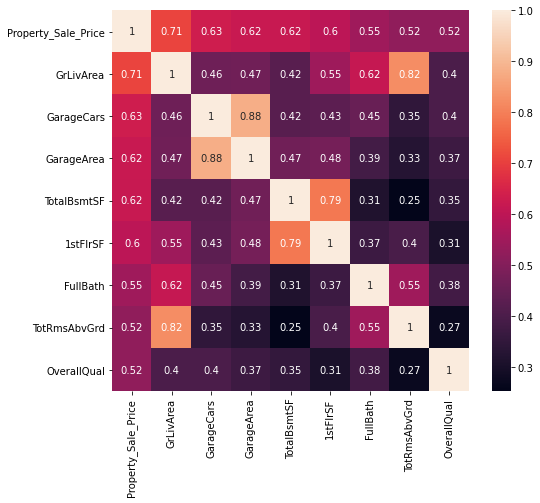

In [109]:
r[r>0.5].index
topn_feat_corr = df1[r[r>0.5].index].corr()
plt.figure(figsize=(8,7))
sns.heatmap(topn_feat_corr,annot=True)
plt.show()

In [112]:
# thresh=0.5
# topn_feat = corr.index(corr['Property_Sale_Price']>thresh)
# topn_feat
# # corr_topn = df1[topn_feat].corr()
# # sns.heatmap(corr_topn,annot=True)
# # plt.show()

###  Handling Outliers

1) 5 point summary<br>
2) 95% or 97% or 98% or 99% percentile as outliers

In [114]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Dwell_Type,2072.0,60.546815,159.962845,20.0,20.00,50.0,70.00,7080.0
LotFrontage,2072.0,70.194015,26.108140,21.0,60.00,65.0,80.00,313.0
LotArea,2072.0,10718.327703,9218.181733,1300.0,7614.75,9491.0,11602.25,215245.0
OverallQual,2072.0,6.234073,1.517239,1.0,5.00,6.0,7.00,10.0
OverallCond,2072.0,5.835425,1.360419,1.0,5.00,5.0,7.00,9.0
YearBuilt,2072.0,1969.428089,30.219264,1872.0,1950.00,1971.0,1999.00,2010.0
YearRemodAdd,2072.0,1986.607625,20.432716,1950.0,1970.00,1995.0,2004.00,2023.0
MasVnrArea,2072.0,101.236486,178.787139,0.0,0.00,0.0,160.00,1600.0
BsmtFinSF1,2072.0,438.160714,448.055891,0.0,0.00,382.0,709.00,5644.0
BsmtFinSF2,2072.0,49.243243,165.657914,0.0,0.00,0.0,0.00,1474.0


In [116]:
df1.describe(percentiles=[0.95,0.97,0.98,0.99])

,Dwell_Type,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Property_Sale_Price
count,2072.000000,2072.000000,2072.000000,2072.000000,2072.000000,2072.000000,2072.000000,2072.000000,2072.000000,2072.000000,...,2072.000000,2072.000000,2072.000000,2072.000000,2072.000000,2072.000000,2072.000000,2072.000000,2072.000000,2072.000000
mean,60.546815,70.194015,10718.327703,6.234073,5.835425,1969.428089,1986.607625,101.236486,438.160714,49.243243,...,94.166023,46.057915,21.040058,2.980695,14.559363,2.300193,39.755792,6.288127,2007.851834,180973.783784
std,159.962845,26.108140,9218.181733,1.517239,1.360419,30.219264,20.432716,178.787139,448.055891,165.657914,...,129.103208,64.776446,59.582515,26.823612,54.111741,37.420028,429.922383,2.690630,1.330022,78684.844435
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
50%,50.000000,65.000000,9491.000000,6.000000,5.000000,1971.000000,1995.000000,0.000000,382.000000,0.000000,...,0.000000,24.500000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163945.000000
95%,160.000000,107.000000,20138.950000,9.000000,9.000000,2007.000000,2008.000000,448.000000,1238.000000,451.800000,...,340.900000,172.900000,170.900000,0.000000,161.900000,0.000000,0.000000,11.000000,2010.000000,326900.000000
97%,160.000000,115.000000,26081.610000,9.000000,9.000000,2007.000000,2009.000000,571.000000,1351.000000,557.000000,...,393.740000,209.740000,213.740000,0.000000,192.000000,0.000000,400.000000,12.000000,2010.000000,369561.220000
98%,190.000000,121.000000,32284.920000,9.000000,9.000000,2008.000000,2011.580000,651.000000,1438.320000,670.000000,...,440.160000,239.160000,228.000000,0.000000,218.320000,0.000000,500.000000,12.000000,2010.000000,392290.000000
99%,190.000000,141.870000,40951.390000,9.000000,9.000000,2009.000000,2017.000000,776.640000,1572.290000,849.120000,...,517.580000,282.870000,252.580000,163.740000,260.870000,0.000000,700.000000,12.000000,2010.000000,441815.690000
max,7080.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2023.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
# Dwell_Type, Lot_Area, MasVnrArea, BsmtFinSF1, Property_Sale_Price

In [117]:
w = np.array([2,4,5,6,7,8,9,10])
res = np.where(w>5, 0,w)
res

array([2, 4, 5, 0, 0, 0, 0, 0])

### Outlier Clipping

In [119]:
df1['Dwell_Type'] = np.where(df1['Dwell_Type']>190.000000, 190.000000, df1['Dwell_Type'])
df1['LotArea'] = np.where(df1['LotArea']>32284.920, 32284.920, df1['LotArea'])
df1['Property_Sale_Price'] = np.where(df1['Property_Sale_Price']>392290.00, 392290.00, df1['Property_Sale_Price'])


### Encode Categorical Variables

In [121]:
print(df1_obj_cols.columns)
print(df1_num_cols.columns)

Index(['Zone_Class', 'Road_Type', 'Property_Shape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'Dwelling_Type', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')
Index(['Id', 'Dwell_Type', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
  

In [122]:
df1.dtypes.value_counts()

object     39
int64      31
float64     7
dtype: int64

In [120]:
from sklearn.preprocessing import LabelEncoder

In [123]:
lb = LabelEncoder()
c = df1_obj_cols.columns
for i in c:
    df1[i] = lb.fit_transform(df1[i])

In [124]:
df1.dtypes.value_counts()

int32      39
int64      31
float64     7
dtype: int64

In [125]:
x = df1.drop('Property_Sale_Price',axis=1)
y = df1['Property_Sale_Price']
print(x.shape)
print(y.shape)

(2072, 76)
(2072,)


In [126]:
from sklearn.model_selection import train_test_split

In [127]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1554, 76)
(518, 76)
(1554,)
(518,)


### Linear Reg using Sklearn

In [128]:
from sklearn.linear_model import LinearRegression

In [129]:
m1 = LinearRegression()
m1.fit(x_train,y_train)

LinearRegression()

In [130]:
# Model score - R2_Score
print('Training Score',m1.score(x_train,y_train))
print('Testing Score',m1.score(x_test,y_test))

Training Score 0.8890752837238872
Testing Score 0.761325879788666


In [133]:
ypred_m1 = m1.predict(x_test)

In [132]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [135]:
mae = mean_absolute_error(y_test,ypred_m1)
mse = mean_squared_error(y_test,ypred_m1)
rmse = np.sqrt(mean_squared_error(y_test,ypred_m1))
r2s = r2_score(y_test,ypred_m1)
print('MAE',mae)
print('MSE',mse)
print('RMSE',rmse)
print('R2_score',r2s)
print('Model_Score',m1.score(x_test,y_test))

MAE 18890.965294604695
MSE 1162337612.434195
RMSE 34093.07279249254
R2_score 0.761325879788666
Model_Score 0.761325879788666


In [138]:
m = m1.coef_
c = m1.intercept_
print('Coefficients',m)
print('Intercept',c)

Coefficients [-2.15879766e+01 -3.42111948e+03 -1.40274091e+01  2.98100574e-01
  3.14118820e+04 -9.21427278e+02  9.52518188e+02 -2.99439055e+04
  1.72248688e+02  8.37413107e+03  3.84651308e+02 -2.86598324e+02
 -1.39856029e+04 -1.87438338e+03 -6.80890241e+01  2.21880939e+03
  1.74865212e+03  8.31538332e+01  1.47573768e+02  5.86069018e+02
  2.46862387e+03 -1.05650845e+03  8.00128142e+02  3.44654882e+03
  2.28763749e+01 -9.02117593e+03  1.66863569e+03  3.01576885e+03
 -4.87978467e+03  8.92477152e+02 -2.24398360e+03  5.17564553e+02
  1.27186445e+01  8.82338717e+02  6.26317790e+00 -1.55920140e+00
  1.74226210e+01 -3.03845626e+03 -1.35482059e+03  5.63537505e+03
  4.09749574e+02  2.98378853e+01  2.62852906e+01 -3.82860927e+01
  1.78370832e+01  5.35929807e+03 -4.60654697e+03  1.73772653e+03
  1.68652359e+03 -1.39753569e+03 -1.72557022e+04 -8.52244928e+03
  1.81424363e+03  4.87105988e+03  7.73077174e+03 -1.31090473e+03
  2.28299932e+02 -6.49124124e+01 -2.63772983e+03  4.26005536e+03
  2.69938151

#### OLS Model

In [136]:
import statsmodels.api as sm

In [137]:
x1 = x_train
y1 = y_train

x1 = sm.add_constant(x1)

m2 = sm.OLS(y1,x1).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Property_Sale_Price   R-squared:                       0.889
Model:                             OLS   Adj. R-squared:                  0.884
Method:                  Least Squares   F-statistic:                     162.5
Date:                 Tue, 31 May 2022   Prob (F-statistic):               0.00
Time:                         11:58:52   Log-Likelihood:                -17869.
No. Observations:                 1554   AIC:                         3.589e+04
Df Residuals:                     1480   BIC:                         3.628e+04
Df Model:                           73                                         
Covariance Type:             nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.186e+06      1e+06      1.181      0.238   -7.85e+05    3.16e+06
Dwell_Type       -21.5880     15.305     -1.411      0.159     -51.609       8.433
Zone_Class     -3421.1195   1102.287     -3.104      0.002   -5583.330   -1258.909
LotFrontage      -14.0274     28.359     -0.495      0.621     -69.656      41.601
LotArea            0.2981      0.147      2.022      0.043       0.009       0.587
Road_Type       3.141e+04   1.17e+04      2.694      0.007    8538.972    5.43e+04
Property_Shape  -921.4273    493.908     -1.866      0.062   -1890.262      47.407
LandContour      952.5182   1001.410      0.951      0.342   -1011.816    2916.853
Utilities      -2.994e+04   1.89e+04     -1.585      0.113    -6.7e+04    7111.091
LotConfig        172.2487    406.802      0.423      0.672    -625.721     970.219
LandSlope       8374.1311   2930.658      2.857      0.004    2625.446    1.41e+04
Neighborhood     384.6513    118.116      3.257      0.001     152.959     616.343
Condition1      -286.5983    734.571     -0.390      0.696   -1727.510    1154.313
Condition2     -1.399e+04   3258.215     -4.292      0.000   -2.04e+04   -7594.392
Dwelling_Type  -1874.3834    989.961     -1.893      0.059   -3816.260      67.493
HouseStyle       -68.0890    478.140     -0.142      0.887   -1005.994     869.816
OverallQual     2218.8094    508.574      4.363      0.000    1221.207    3216.411
OverallCond     1748.6521    512.633      3.411      0.001     743.088    2754.216
YearBuilt         83.1538     36.676      2.267      0.024      11.211     155.096
YearRemodAdd     147.5738     49.321      2.992      0.003      50.827     244.320
RoofStyle        586.0690    848.543      0.691      0.490   -1078.406    2250.544
RoofMatl        2468.6239   1128.701      2.187      0.029     254.599    4682.649
Exterior1st    -1056.5084    378.412     -2.792      0.005   -1798.789    -314.228
Exterior2nd      800.1281    337.974      2.367      0.018     137.170    1463.086
MasVnrType      3446.5488   1217.783      2.830      0.005    1057.784    5835.313
MasVnrArea        22.8764      4.827      4.739      0.000      13.407      32.345
ExterQual      -9021.1759   1454.693     -6.201      0.000   -1.19e+04   -6167.697
ExterCond       1668.6357    928.627      1.797      0.073    -152.929    3490.200
Foundation      3015.7689   1191.536      2.531      0.011     678.491    5353.047
BsmtQual       -4879.7847    774.420     -6.301      0.000   -6398.863   -3360.707
BsmtCond         892.4772    725.481      1.230      0.219    -530.603    2315.557
BsmtExposure   -2243.9836    660.373     -3.398      0.001   -3539.350    -948.618
BsmtFinType1     517.5646    384.845      1.345      0.179    -237.336    1272.465
BsmtFinSF1        12.7186      2.254      5.643      0.000       8.298      17.140
B